<a href="https://colab.research.google.com/github/esgiraldop/machine-learning/blob/master/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#To mount drive for workspace. 
from google.colab import drive

#This will prompt for authorization.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.cm as cm
import random as rd

# Borrar despues de terminar ejemplo
from sklearn import datasets

# Para k incremental
from sklearn.metrics import pairwise_distances
from numpy import zeros
from sklearn.cluster import KMeans

In [15]:
path_to_datos = '/content/drive/My Drive/CursoMLAvanzado/Estudiantes/Luis-Vesga-Erick-Giraldo/Tarea 4/Motor_Completo+ruido.csv';

motorData = pd.read_csv(path_to_datos, sep = ';', skiprows = [1], header = 0, 
                        names = ['Clase[k]', 'rpm', 'temp', 'acel'])

y = motorData['Clase[k]']
X = motorData.drop(columns = ['Clase[k]'])
print(X)
X.info()

              rpm        temp       acel
0     1505.442505  197.880602  21.243581
1     1497.687211  199.034578  22.300807
2     1507.396785  192.519874  21.164998
3     1516.307756  197.206980  21.558114
4     1488.131738  194.901988  22.167737
...           ...         ...        ...
5094  2724.651280  371.633927  64.998009
5095  2722.150769  371.025653  65.090376
5096  2738.555164  369.844523  64.916607
5097  2734.392516  374.215392  64.752140
5098  2720.868999  374.197576  65.059723

[5099 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 3 columns):
rpm     5099 non-null float64
temp    5099 non-null float64
acel    5099 non-null float64
dtypes: float64(3)
memory usage: 119.6 KB


           rpm      temp      acel
rpm   1.000000  0.612042  0.814949
temp  0.612042  1.000000  0.936044
acel  0.814949  0.936044  1.000000


<function matplotlib.pyplot.show>

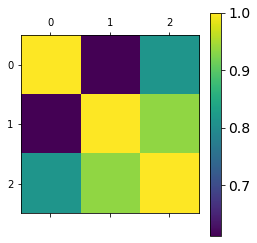

In [16]:
# correlation matrix
print(X.corr())
plt.matshow(X.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.show

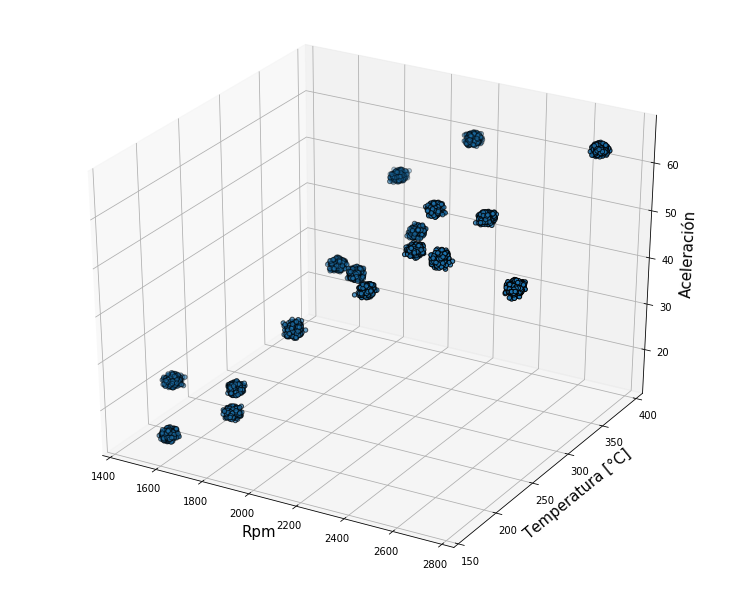

In [17]:
# plotting data in 3D for visualization

fig = plt.figure(figsize = [10,8])
ax = Axes3D(fig)
ax.scatter(X.iloc[1:,0],X.iloc[1:,1],X.iloc[1:,2], cmap = plt.cm.nipy_spectral,
           edgecolor = 'k')
ax.set_xlabel('Rpm', fontsize = 15)
ax.set_ylabel('Temperatura [°C]', fontsize = 15)
ax.set_zlabel('Aceleración', fontsize = 15)
plt.show()


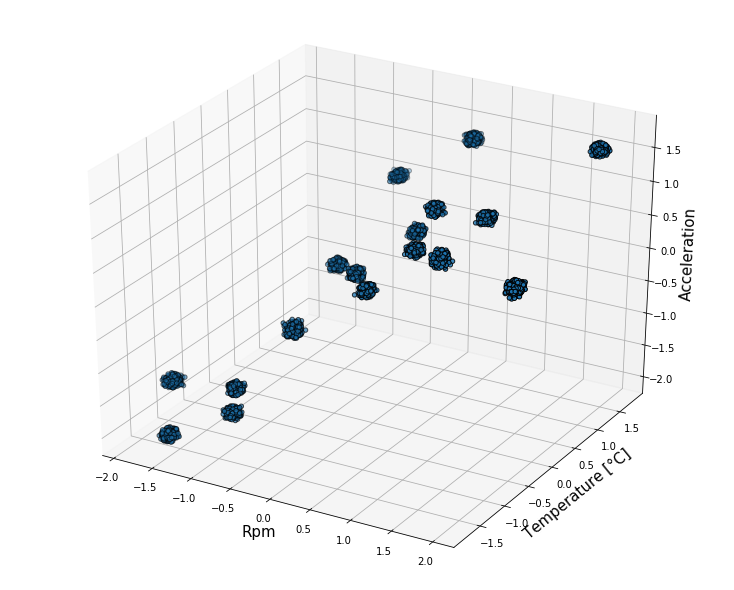

In [18]:
#standardizing X for appliying DBSCAN

X_array = StandardScaler().fit_transform(X)

fig = plt.figure(figsize = [10,8])
ax = Axes3D(fig)
ax.scatter(X_array[1:,0], X_array[1:,1], X_array[1:,2], cmap = plt.cm.nipy_spectral,
           edgecolor = 'k')
ax.set_xlabel('Rpm', fontsize = 15)
ax.set_ylabel('Temperature [°C]', fontsize = 15)
ax.set_zlabel('Acceleration', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Add

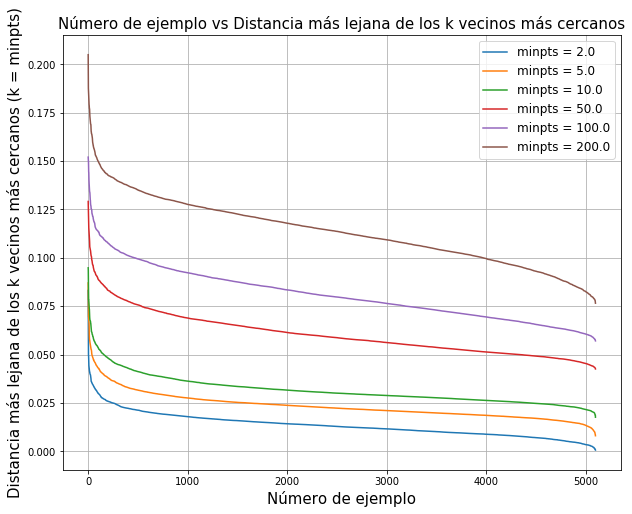

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


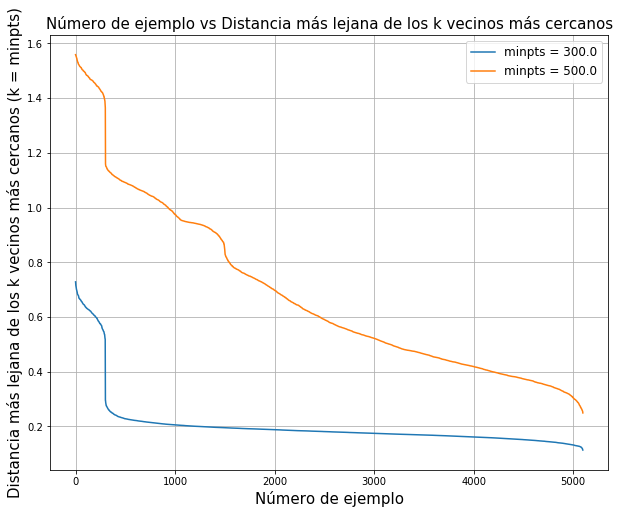

In [19]:
# estimating minimum points parameter for the knn algorithm through plotting some elbow plots
minpts = [2, 5, 10, 50, 100, 200, 300, 500]
plt.figure(figsize = [10,8])
for i in minpts:
  min_samples = i
  k = min_samples if min_samples > 2 else 2 # selecting the max num of nearest neighbors for the elbow plot
  nbrs = NearestNeighbors(n_neighbors = k).fit(X_array)
  distances, indices = nbrs.kneighbors(X_array)

  X['knn farthest distance'] = distances[:,-1]
  knnDist_sorted = X.sort_values('knn farthest distance', ascending = False).reset_index()[['knn farthest distance']]
  ax = plt.subplot(1,1,1)
  ax.plot(knnDist_sorted, label = 'minpts = %1.1f' %i)
  plt.title('Número de ejemplo vs Distancia más lejana de los k vecinos más cercanos', fontsize = 15)
  ax.legend(fontsize = 12)
  if i == 2:
    plt.xlabel('Número de ejemplo', fontsize = 15)
    plt.ylabel('Distancia más lejana de los k vecinos más cercanos (k = minpts)', fontsize = 15)
    plt.grid(True)

  if i == 200:
    plt.show()
    plt.figure(figsize = [10,8])
    plt.xlabel('Número de ejemplo', fontsize = 15)
    plt.ylabel('Distancia más lejana de los k vecinos más cercanos (k = minpts)', fontsize = 15)
    plt.grid(True)


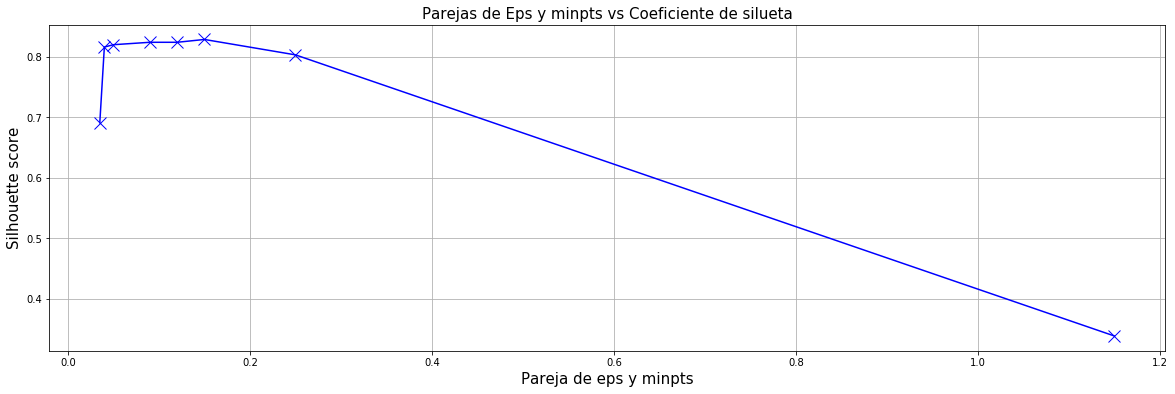

In [20]:
# selecting the radiuses of the previous elbow plots
radiuses = [0.035, 0.04, 0.05, 0.09, 0.12, 0.15, 0.25, 1.15]
minpts = [2, 5, 10, 50, 100, 200, 300, 500]

# Applying DBSCAN for all of the radiuses and minpts and calculating silhouette score
count = 0
silhouette = np.zeros_like(radiuses)

for i, j in zip(minpts, radiuses):
  min_samples = i
  eps = j
  dbscan = DBSCAN(eps = eps, metric = 'euclidean', algorithm = 'auto',
                  min_samples = min_samples).fit(X_array)
  labels = dbscan.labels_

  silhouette[count] = metrics.silhouette_score(X_array, labels)
  count = count + 1

plt.figure(figsize = [20,6])
plt.plot(radiuses, silhouette, 'bx-', markersize = 12)
plt.title('Parejas de Eps y minpts vs Coeficiente de silueta', fontsize = 15)
plt.xlabel('Pareja de eps y minpts', fontsize = 15)
plt.ylabel('Silhouette score', fontsize = 15)
plt.grid(True)

The combination of 'eps' and 'min_samples' with the highest silhouette score according to the previous plot is 0.12 and 100 respectively

In [21]:
eps = 0.12
min_samples = 100
# appliying DBSCAN
dbscan = DBSCAN(eps = eps, metric = 'euclidean', algorithm = 'auto',
                min_samples = min_samples).fit(X_array)
corepts = np.zeros_like(dbscan.labels_, dtype = bool)
corepts[dbscan.core_sample_indices_] = True
outlierPositions = np.where(corepts == False)
labels = dbscan.labels_

numLabelsNoNoise = len(set(labels)) - (1 if -1 in labels else 0)
numLabels = set(labels)

print('Clusters creados incluyendo outliers: ', list(numLabels))
print('Número de clusters: ', len(numLabels))
print('Número de clusters ignorando el ruido: ', numLabelsNoNoise)


Clusters creados incluyendo outliers:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Número de clusters:  17
Número de clusters ignorando el ruido:  17


Text(0.5, 0.92, 'Estimated number of clusters: 17')

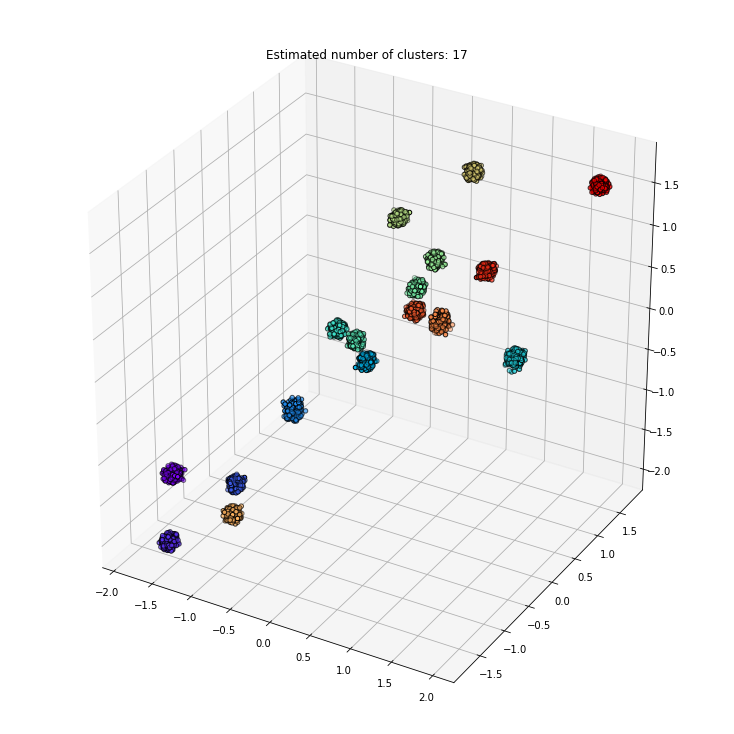

In [22]:
fig = plt.figure(figsize = [10,10])
ax = Axes3D(fig)
randlist = np.zeros(len(numLabels))

# generating matrix for colors
num = np.arange(len(numLabels))
ys = [i+num+(i*num)**2 for i in range(17)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

# assigning colors to clusters.
for i in numLabels:
    
    pointColor = colors[i]
    
    if i == -1:
        pointColor = [1, 0, 0, 1]
    clusterMember = (labels == i)
    
    xy = X_array[clusterMember & corepts]
    ax.scatter(xy[:, 0], xy[:,1], xy[:,2], 'o', color = tuple(pointColor), cmap = plt.cm.nipy_spectral,
           edgecolor = 'k')
    
    xy = X_array[clusterMember & ~corepts]
    ax.scatter(xy[:,0], xy[:,1], xy[:,2], 'o', color = tuple(pointColor), cmap = plt.cm.nipy_spectral,
           edgecolor = 'k')
    
plt.title('Estimated number of clusters: %d' % numLabelsNoNoise)

## Evaluando el coeficiente de silueta

---



Silhouette score:  [0.86259375 0.8845875  0.83784885 ... 0.9304177  0.94898113 0.95348107]
Coeficiente de solueta promedio:  0.8239120973240334
Desviación estandar del coeficiente de silueta:  0.07869511985250241


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


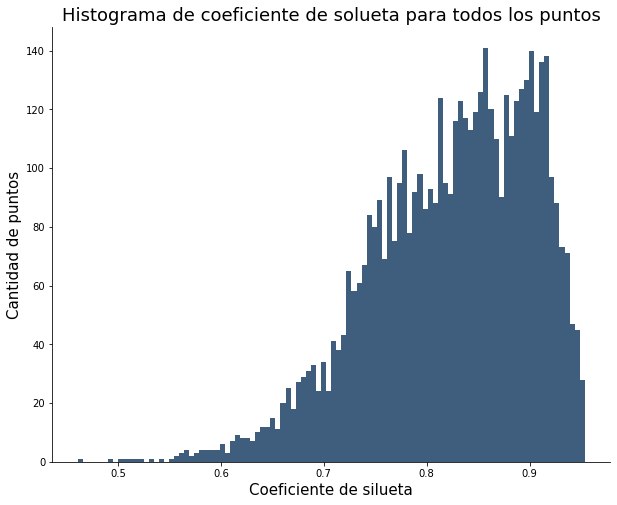

In [23]:
samplesSilhouetteScore = metrics.silhouette_samples(X_array, labels, metric = 'euclidean')
meanSilhouetteScore = metrics.silhouette_score(X_array, labels, metric = 'euclidean')
print('Silhouette score: ', samplesSilhouetteScore)

plt.figure(figsize = (10,8))
plt.hist(samplesSilhouetteScore, bins = 100, color="#3F5D7D")
plt.title('Histograma de coeficiente de solueta para todos los puntos', fontsize = 18)
plt.xlabel('Coeficiente de silueta', fontsize = 15)
plt.ylabel('Cantidad de puntos', fontsize = 15)

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

# Mean silhouette score
print('Coeficiente de solueta promedio: ', meanSilhouetteScore)
print('Desviación estandar del coeficiente de silueta: ', np.std(samplesSilhouetteScore))

## Midiendo exactitud

In [29]:
import sys
np.set_printoptions(threshold=1000)   # set threshold=sys.maxsize for showing all the vector

# y starts counting from 1, labels from 0, so i need to do y-1 in order to compare
y_pred = labels
y_true = np.array(y-1)
Accuracy = metrics.accuracy_score(y_true, y_pred, normalize=True)*100
print('La exactitud es', Accuracy,'%')

La exactitud es 100.0 %
